**Import Libraries**

In [1]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
sns.set(style="whitegrid")
import tensorflow as tf
from tensorflow.keras import layers, models
import numpy as np
import os
import cv2
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import classification_report, confusion_matrix
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout, BatchNormalization
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import EarlyStopping
from google.colab import drive
import zipfile
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from tensorflow.keras.applications import EfficientNetB0
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.preprocessing import image_dataset_from_directory
from tensorflow.keras.preprocessing.image import img_to_array
from google.colab import files




**Dataset**

In [2]:
df = pd.read_csv('HAM10000_metadata.csv')

## Dataset Description: HAM10000 Skin Lesion Dataset

**File**: `HAM10000_metadata.csv`  
**Total Records**: 10,015  
**Number of Classes (dx)**: 7  
**Dataset Type**: Multiclass classification (Skin lesion types)

---

###  Class Distribution:

- **nv** (Melanocytic nevi): 6705 samples (66.94%)  
- **mel** (Melanoma): 1113 samples (11.11%)  
- **bkl** (Benign keratosis-like lesions): 1099 samples (10.97%)  
- **bcc** (Basal cell carcinoma): 514 samples (5.13%)  
- **akiec** (Actinic keratoses): 327 samples (3.26%)  
- **vasc** (Vascular lesions): 142 samples (1.42%)  
- **df** (Dermatofibroma): 115 samples (1.15%)

---

###  Columns:

**1. lesion_id (str)**  
- Unique identifier for each lesion (multiple images may share this ID).  
- Useful for patient-level analysis.

**2. image_id (str)**  
- Unique image identifier.  
- Used to locate images in the dataset (e.g., `image_id.jpg`).

**3. dx (str)**  
- Target diagnosis class label.  
- One of 7 types: `'nv'`, `'mel'`, `'bkl'`, `'bcc'`, `'akiec'`, `'vasc'`, `'df'`.

**4. dx_type (str)**  
- Method of diagnosis confirmation.  
- Values: `'histopathology'`, `'follow_up'`, `'consensus'`, `'confocal'`.

**5. age (float)**  
- Patient's age in years.  
- Some values may be missing (NaN).  
- Typical range: 0–85.

**6. sex (str)**  
- Sex of the patient.  
- Values: `'male'`, `'female'`  
- Some entries may be missing.

**7. localization (str)**  
- Body part where the lesion is located.  
- Examples: `'back'`, `'lower extremity'`, `'face'`, `'chest'`, etc.

---

###  Statistical Summary:

- **Average Patient Age**: ~52 years  
- **Most Common Class**: Melanocytic nevi (`nv`)  
- **Least Common Class**: Dermatofibroma (`df`)  
- **Class Imbalance**: Highly imbalanced — consider using techniques like:
  - Data augmentation  
  - Oversampling rare classes  
  - Weighted loss functions

---

###  Example Row:

| lesion_id      | image_id   | dx   | dx_type         | age  | sex    | localization     |
|----------------|------------|------|------------------|------|--------|------------------|
| HAM_0000116    | ISIC_0027419 | bkl  | histopathology   | 80.0 | male   | lower extremity  |

---

###  Usage:

- This dataset is suitable for **multi-class classification** of dermoscopic skin images.
- Can be used to train deep learning models such as **CNNs** or **transfer learning** using models like EfficientNet, ResNet, etc.
- Use `image_id` to load the corresponding image (`image_id.jpg`), and `dx` as the class label.
- Combine metadata (`age`, `sex`, `localization`) for multi-modal approaches or deeper clinical insights.


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10015 entries, 0 to 10014
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   lesion_id     10015 non-null  object 
 1   image_id      10015 non-null  object 
 2   dx            10015 non-null  object 
 3   dx_type       10015 non-null  object 
 4   age           9958 non-null   float64
 5   sex           10015 non-null  object 
 6   localization  10015 non-null  object 
dtypes: float64(1), object(6)
memory usage: 547.8+ KB


In [4]:
df.head(20)

lesion_id      image_id   dx dx_type   age     sex     localization
0   HAM_0000118  ISIC_0027419  bkl   histo  80.0    male            scalp
1   HAM_0000118  ISIC_0025030  bkl   histo  80.0    male            scalp
2   HAM_0002730  ISIC_0026769  bkl   histo  80.0    male            scalp
3   HAM_0002730  ISIC_0025661  bkl   histo  80.0    male            scalp
4   HAM_0001466  ISIC_0031633  bkl   histo  75.0    male              ear
5   HAM_0001466  ISIC_0027850  bkl   histo  75.0    male              ear
6   HAM_0002761  ISIC_0029176  bkl   histo  60.0    male             face
7   HAM_0002761  ISIC_0029068  bkl   histo  60.0    male             face
8   HAM_0005132  ISIC_0025837  bkl   histo  70.0  female             back
9   HAM_0005132  ISIC_0025209  bkl   histo  70.0  female             back
10  HAM_0001396  ISIC_0025276  bkl   histo  55.0  female            trunk
11  HAM_0004234  ISIC_0029396  bkl   histo  85.0  female            chest
12  HAM_0004234  ISIC_0025984  bkl   histo  85.0  female            chest
13  HAM_0001949  ISIC_0025767  bkl   histo  70.0    male            trunk
14  HAM_0001949  ISIC_0032417  bkl   histo  70.0    male            trunk
15  HAM_0007207  ISIC_0031326  bkl   histo  65.0    male             back
16  HAM_0001601  ISIC_0025915  bkl   histo  75.0    male  upper extremity
17  HAM_0001601  ISIC_0031029  bkl   histo  75.0    male  upper extremity
18  HAM_0007571  ISIC_0029836  bkl   histo  70.0    male            chest
19  HAM_0007571  ISIC_0032129  bkl   histo  70.0    male            chest

In [5]:
df.describe(include='all')

lesion_id      image_id     dx dx_type          age    sex  \
count         10015         10015  10015   10015  9958.000000  10015   
unique         7470         10015      7       4          NaN      3   
top     HAM_0000835  ISIC_0032258     nv   histo          NaN   male   
freq              6             1   6705    5340          NaN   5406   
mean            NaN           NaN    NaN     NaN    51.863828    NaN   
std             NaN           NaN    NaN     NaN    16.968614    NaN   
min             NaN           NaN    NaN     NaN     0.000000    NaN   
25%             NaN           NaN    NaN     NaN    40.000000    NaN   
50%             NaN           NaN    NaN     NaN    50.000000    NaN   
75%             NaN           NaN    NaN     NaN    65.000000    NaN   
max             NaN           NaN    NaN     NaN    85.000000    NaN   

       localization  
count         10015  
unique           15  
top            back  
freq           2192  
mean            NaN  
std             NaN  
min             NaN  
25%             NaN  
50%             NaN  
75%             NaN  
max             NaN

Data Cleaning

In [6]:

print("\nMissing values per column:")
print(df.isnull().sum())



Missing values per column:
lesion_id        0
image_id         0
dx               0
dx_type          0
age             57
sex              0
localization     0
dtype: int64


In [7]:

df['age'] = df['age'].fillna(df['age'].median())
df['sex'] = df['sex'].fillna(df['sex'].mode()[0])
df['localization'] = df['localization'].fillna(df['localization'].mode()[0])


In [8]:

duplicates = df.duplicated().sum()
print(f"\nNumber of duplicate rows: {duplicates}")
df = df.drop_duplicates()



Number of duplicate rows: 0


In [9]:

for col in ['dx', 'sex', 'localization', 'dx_type']:
    print(f"\nUnique values in '{col}': {df[col].unique()}")



Unique values in 'dx': ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']

Unique values in 'sex': ['male' 'female' 'unknown']

Unique values in 'localization': ['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']

Unique values in 'dx_type': ['histo' 'consensus' 'confocal' 'follow_up']


In [10]:
df['sex'] = df['sex'].str.strip().str.lower()
df['dx'] = df['dx'].str.strip().str.lower()
df['localization'] = df['localization'].str.strip().str.lower()


In [11]:
# Final null and shape check
print("\nNull values after cleaning:")
print(df.isnull().sum())

print(f"\nDataset shape after cleaning: {df.shape}")



Null values after cleaning:
lesion_id       0
image_id        0
dx              0
dx_type         0
age             0
sex             0
localization    0
dtype: int64

Dataset shape after cleaning: (10015, 7)


In [12]:
df.head()

lesion_id      image_id   dx dx_type   age   sex localization
0  HAM_0000118  ISIC_0027419  bkl   histo  80.0  male        scalp
1  HAM_0000118  ISIC_0025030  bkl   histo  80.0  male        scalp
2  HAM_0002730  ISIC_0026769  bkl   histo  80.0  male        scalp
3  HAM_0002730  ISIC_0025661  bkl   histo  80.0  male        scalp
4  HAM_0001466  ISIC_0031633  bkl   histo  75.0  male          ear

In [13]:
print("Data types before encoding:")
print(df.dtypes)
for col in ['dx', 'sex', 'localization', 'dx_type']:
    print(f"\nUnique values in {col}: {df[col].unique()}")


Data types before encoding:
lesion_id        object
image_id         object
dx               object
dx_type          object
age             float64
sex              object
localization     object
dtype: object

Unique values in dx: ['bkl' 'nv' 'df' 'mel' 'vasc' 'bcc' 'akiec']

Unique values in sex: ['male' 'female' 'unknown']

Unique values in localization: ['scalp' 'ear' 'face' 'back' 'trunk' 'chest' 'upper extremity' 'abdomen'
 'unknown' 'lower extremity' 'genital' 'neck' 'hand' 'foot' 'acral']

Unique values in dx_type: ['histo' 'consensus' 'confocal' 'follow_up']


ENCODING

In [14]:


label_encoders = {}
categorical_cols = ['sex', 'localization', 'dx_type']

for col in categorical_cols:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le


SCALING

In [15]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
df['age_scaled'] = scaler.fit_transform(df[['age']])


In [16]:

corr_df = df.copy()
categorical_cols = ['sex', 'localization', 'dx_type', 'dx','age_scaled']
le = LabelEncoder()
for col in categorical_cols:
    corr_df[col] = le.fit_transform(corr_df[col])

In [17]:

feature_cols = ['age_scaled', 'sex', 'localization', 'dx_type']
X = df[feature_cols]
y = df['dx']


In [18]:

diagnosis_map = {
    'nv': 'Melanocytic nevi',
    'mel': 'Melanoma',
    'bkl': 'Benign keratosis-like lesions',
    'bcc': 'Basal cell carcinoma',
    'akiec': 'Actinic keratoses',
    'vasc': 'Vascular lesions',
    'df': 'Dermatofibroma'
}

# Add new column with full diagnosis
df['dx_full'] = df['dx'].map(diagnosis_map)




###  Diagnosis Type Distribution Analysis



/tmp/ipython-input-2626935736.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='dx_full', order=df['dx_full'].value_counts().index, palette='Set2')


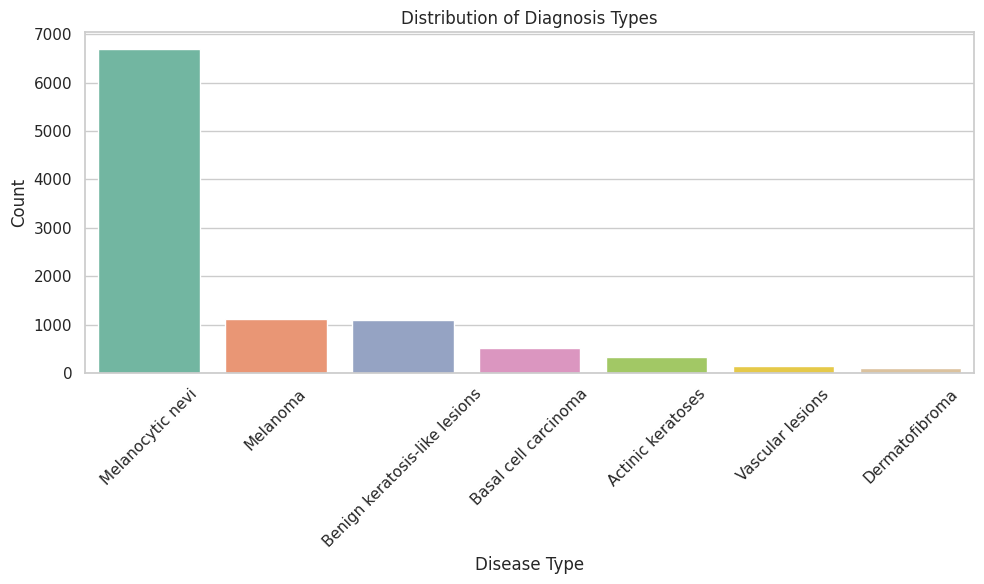

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dx_full', order=df['dx_full'].value_counts().index, palette='Set2')
plt.title("Distribution of Diagnosis Types")
plt.xticks(rotation=45)
plt.xlabel("Disease Type")
plt.ylabel("Count")
plt.tight_layout()
plt.show()


**Observation:**
The bar plot above displays the distribution of various skin disease types in the HAM10000 dataset. It is clearly visible that *melanocytic nevi* has the highest occurrence, followed by *seborrheic keratosis* and *benign keratosis-like lesions*. On the other hand, critical conditions like *melanoma*, *basal cell carcinoma*, and *vascular lesions* appear far less frequently, indicating a significant class imbalance across diagnostic categories.

**Conclusion:**
This skewed distribution suggests that the dataset is imbalanced, which could lead to biased predictions favoring the majority classes during model training. To mitigate this, techniques like data augmentation, resampling, or applying class weights should be considered to ensure the model generalizes well across all diagnosis types.




###  Age Distribution of Patients


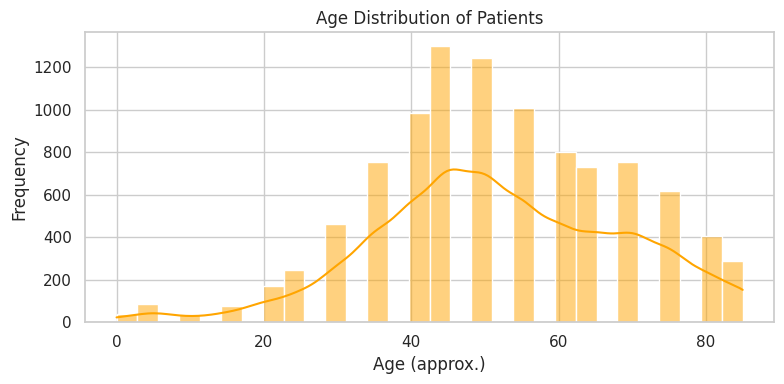

In [20]:
plt.figure(figsize=(8, 4))
sns.histplot(df['age'], kde=True, bins=30, color='orange')
plt.title("Age Distribution of Patients")
plt.xlabel("Age (approx.)")
plt.ylabel("Frequency")
plt.tight_layout()
plt.show()



**Observation:**
The histogram above shows the distribution of patient ages in the HAM10000 dataset. Most patients fall within the 30 to 60-year age range, with a peak around the mid-40s. There are fewer instances of patients below 20 or above 75, indicating that middle-aged adults are the most represented group in this dataset.

**Conclusion:**
The age distribution suggests that skin lesions are more commonly recorded in middle-aged individuals within this dataset. This demographic skew should be taken into account when interpreting model performance, as it may not generalize well to very young or elderly populations unless balanced or adjusted during data preprocessing.




###  Diagnosis Distribution by Sex

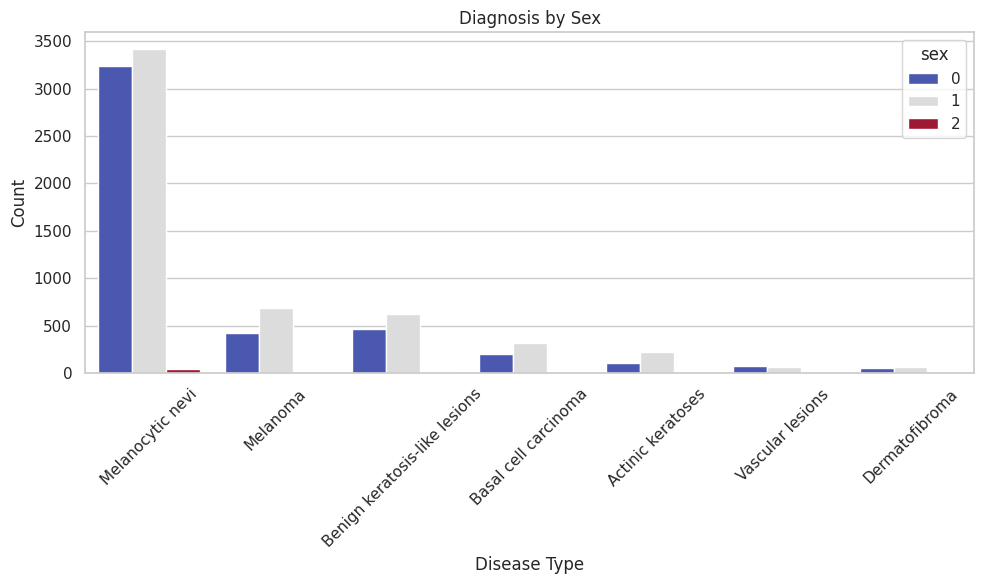

In [21]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dx_full', hue='sex', order=df['dx_full'].value_counts().index, palette='coolwarm')
plt.title("Diagnosis by Sex")
plt.xlabel("Disease Type")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




**Observation:**
The countplot illustrates the distribution of different skin lesion diagnoses (`dx_full`) categorized by the patient's sex. For most disease types such as **melanocytic nevi**, **seborrheic keratosis**, and **basal cell carcinoma**, female patients are slightly more represented than male patients. However, the difference is not stark for most classes, indicating a relatively balanced dataset in terms of gender.

**Conclusion:**
This gender-wise distribution helps understand whether the dataset has any significant gender bias for specific diagnoses. While the overall gender balance appears reasonable, models should still be evaluated for potential performance discrepancies between male and female patients, especially for diagnosis classes with low support.




###  Gender Distribution per Lesion Type




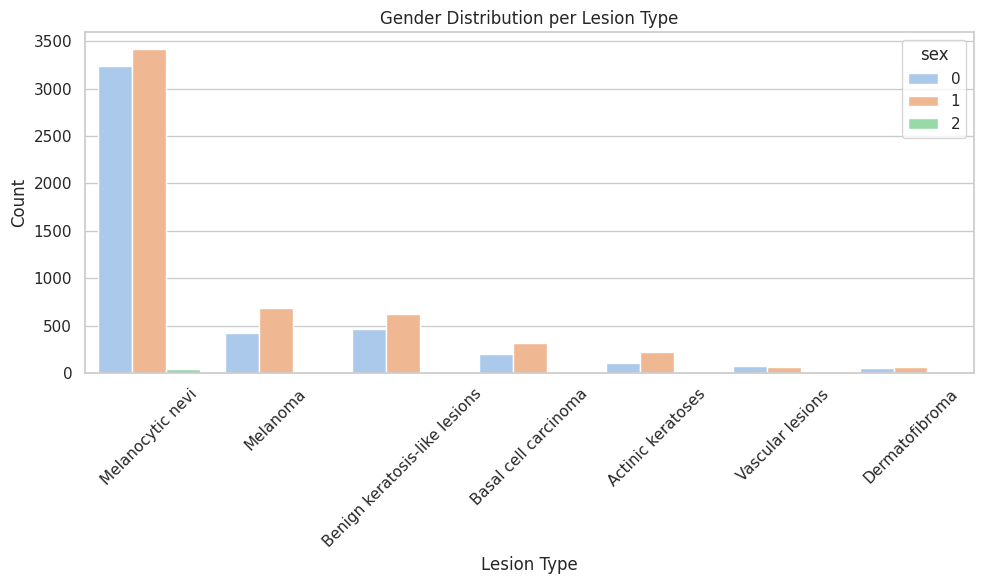

In [22]:
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='dx_full', hue='sex', palette='pastel', order=df['dx_full'].value_counts().index)
plt.title('Gender Distribution per Lesion Type')
plt.xlabel('Lesion Type')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


**Observation:**
The countplot displays the number of male and female patients diagnosed with each type of skin lesion (`dx_full`). The pastel color scheme differentiates genders, making it clear that some lesion types like **melanocytic nevi** are slightly more frequent among females, while others such as **vascular lesions** show a more balanced or even male-dominant distribution. A few rare lesion types have noticeably fewer samples and may show skewed gender representation.

**Conclusion:**
Understanding gender distribution across lesion types is crucial to prevent bias in model training. While the overall balance is fairly even for major categories, rare lesion types should be handled carefully during model evaluation to ensure fairness across genders.



###  Age Distribution by Lesion Type

/tmp/ipython-input-1912177945.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='dx_full', y='age', palette='coolwarm')


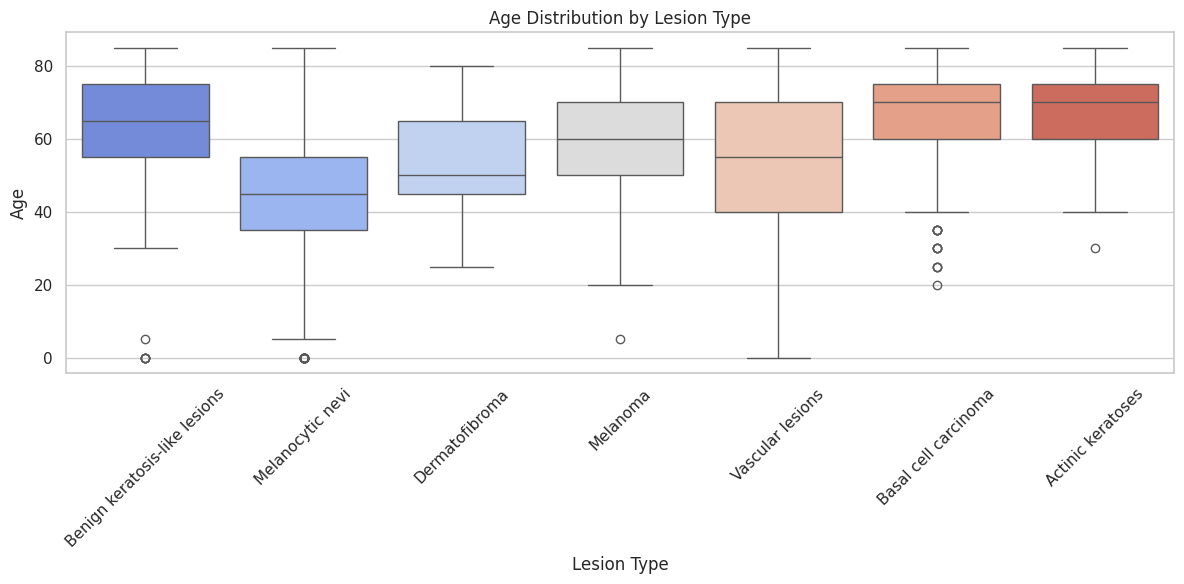

In [23]:
plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='dx_full', y='age', palette='coolwarm')
plt.title('Age Distribution by Lesion Type')
plt.xlabel('Lesion Type')
plt.ylabel('Age')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




**Observation:**
The boxplot illustrates the spread of patient ages for each skin lesion type (`dx_full`). Lesions like **melanoma** and **basal cell carcinoma** are more common in older age groups, as indicated by higher median ages and wider interquartile ranges. In contrast, **melanocytic nevi** tend to appear more frequently in younger individuals. Some lesion types show outliers, indicating that they can occur across a broad age range.

**Conclusion:**
Age is an important factor in skin lesion diagnosis. Certain lesions are age-specific, which can be leveraged to improve prediction accuracy. The model should account for age patterns to avoid misclassification, especially when lesions common in one age group are rare in another.




###  Disease Type by Body Location

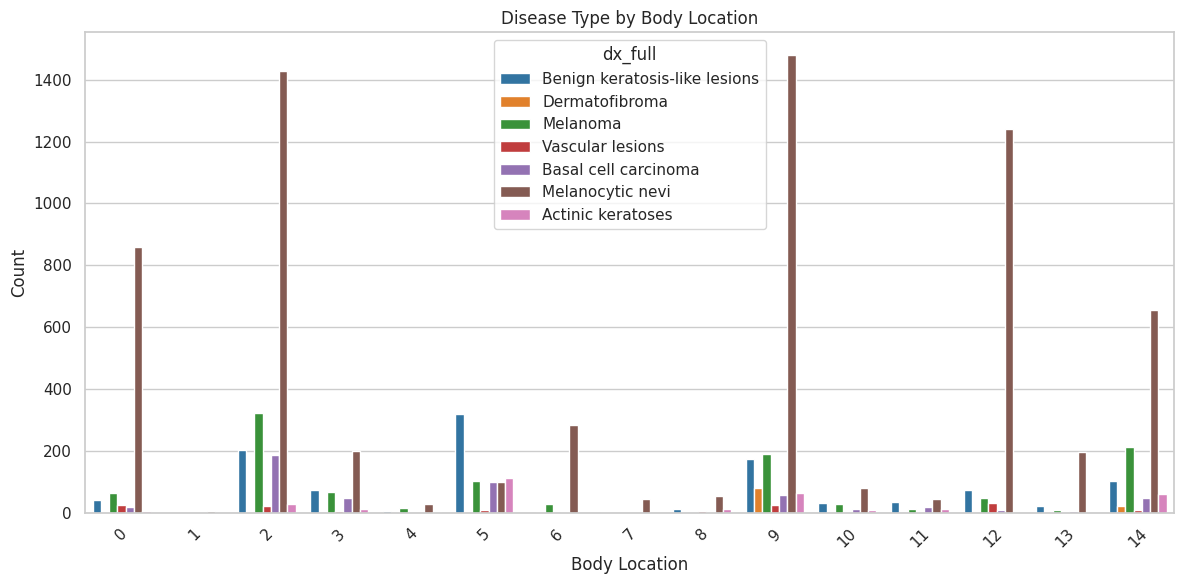

In [24]:
plt.figure(figsize=(12, 6))
sns.countplot(data=df, x='localization', hue='dx_full', palette='tab10')
plt.title("Disease Type by Body Location")
plt.xlabel("Body Location")
plt.ylabel("Count")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




**Observation:**
The chart reveals distinct patterns in lesion occurrence based on body location. For instance, **melanocytic nevi** are more commonly found on the **back and lower limbs**, whereas **basal cell carcinoma** frequently appears on the **face and upper limbs**. Some lesion types are heavily concentrated in specific regions, suggesting anatomical preferences in lesion development.

**Conclusion:**
Body localization plays a significant role in skin lesion classification. Incorporating location-based features can enhance the model’s ability to differentiate between lesion types, as certain skin diseases have preferred anatomical regions of occurrence.




###  Age Group Distribution of Skin Lesion Cases

/tmp/ipython-input-1863443444.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='age_group', palette='BuPu')


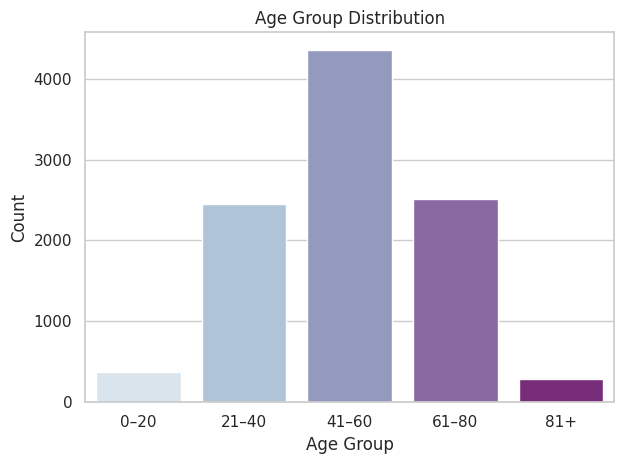

In [25]:
df['age_group'] = pd.cut(df['age'], bins=[0, 20, 40, 60, 80, 100], labels=['0–20', '21–40', '41–60', '61–80', '81+'])
sns.countplot(data=df, x='age_group', palette='BuPu')
plt.title('Age Group Distribution')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.tight_layout()
plt.show()




**Observation:**
The distribution plot shows that the majority of skin lesion cases occur in the **21–40** and **41–60** age groups. Cases significantly decrease after age 60, and very few are reported in the **0–20** and **81+** age groups. This suggests that middle-aged adults are more prone to developing various skin lesions.

**Conclusion:**
Age is a critical factor in skin lesion occurrence. The data indicates a higher vulnerability in middle-aged individuals, highlighting the importance of targeted screening and awareness campaigns for this demographic.




###  Distribution of Lesion Types

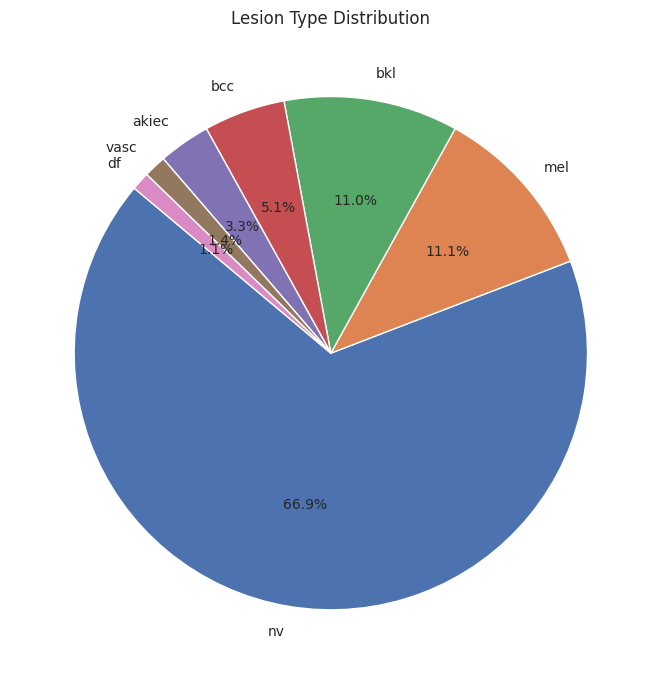

In [26]:
lesion_counts = df['dx'].value_counts()
plt.figure(figsize=(7, 7))
plt.pie(lesion_counts, labels=lesion_counts.index, autopct='%1.1f%%', startangle=140, textprops={'fontsize': 10})
plt.title('Lesion Type Distribution')
plt.tight_layout()
plt.show()




**Observation:**
The pie chart reveals that the majority of cases are dominated by **'nv' (melanocytic nevi)**, which accounts for the largest portion of the dataset. Other types like **'mel' (melanoma)**, **'bkl' (benign keratosis-like lesions)**, and **'bcc' (basal cell carcinoma)** contribute smaller but notable proportions. Rare lesion types like **'vasc'**, **'df'**, and **'akiec'** make up a minor percentage.

**Conclusion:**
The dataset is highly imbalanced, with melanocytic nevi representing the majority of samples. This class imbalance must be considered during model training, as it can impact classification performance and model bias toward the dominant class.




### 🖼️ Image Count per Lesion Type

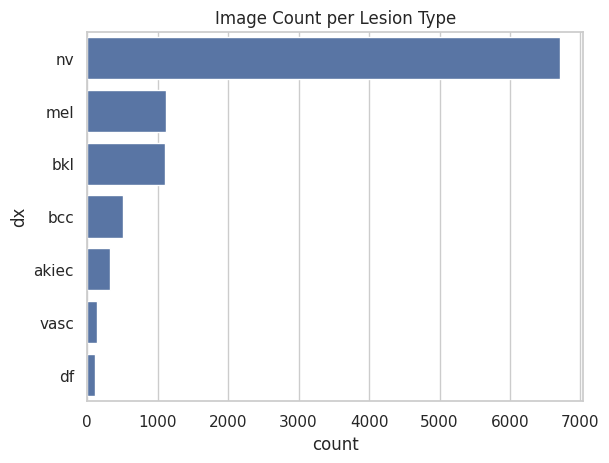

In [27]:
sns.countplot(y='dx', data=df, order=df['dx'].value_counts().index)
plt.title('Image Count per Lesion Type')
plt.show()




**Observation:**
The bar chart clearly indicates that **'nv' (melanocytic nevi)** has the highest number of images, followed by **'mel'**, **'bkl'**, and **'bcc'**. Less frequent lesion types such as **'akiec'**, **'vasc'**, and **'df'** have significantly fewer samples.

**Conclusion:**
There is a noticeable class imbalance in the dataset, which could affect the model's learning capability. Models may tend to favor lesion types with more samples, making it crucial to apply techniques like **data augmentation** or **class weighting** during training.


###  Feature Correlation Heatmap



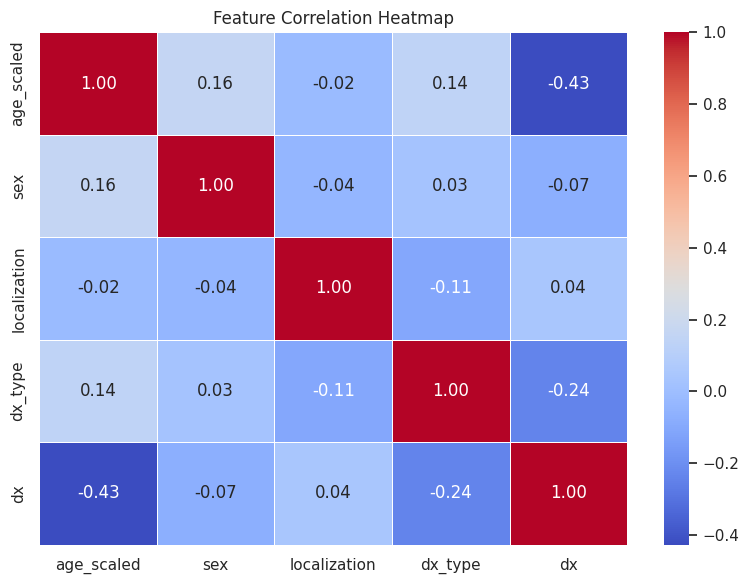

In [28]:

corr = corr_df[['age_scaled', 'sex', 'localization', 'dx_type', 'dx']].corr()

plt.figure(figsize=(8, 6))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Feature Correlation Heatmap")
plt.tight_layout()
plt.show()




**Observation:**
The heatmap illustrates the pairwise correlations among features like **age\_scaled**, **sex**, **localization**, **dx\_type**, and **dx**. Most correlations are relatively low, with only minor positive or negative relationships observed — for instance, **dx\_type** shows mild correlation with **dx**, and **age\_scaled** shows weak negative correlation with some categorical features.

**Conclusion:**
The low correlation values suggest that these features are largely independent of one another, which is beneficial for model diversity. However, it also indicates that no single feature strongly predicts another, implying the need for combining multiple features during training for better performance.


In [29]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [30]:


drive.mount('/content/drive')
base_path = '/content/drive/MyDrive/HAM10000'
zip_paths = [os.path.join(base_path, 'images.zip'),
             os.path.join(base_path, 'images2.zip')]

extract_paths = [os.path.join(base_path, 'images'),
                 os.path.join(base_path, 'images2')]

for zip_path, extract_path in zip(zip_paths, extract_paths):
    if not os.path.exists(extract_path):
        with zipfile.ZipFile(zip_path, 'r') as zip_ref:
            zip_ref.extractall(extract_path)
        print(f" Extracted: {zip_path}")
    else:
        print(f" Already extracted: {extract_path}")

df = pd.read_csv('HAM10000_metadata.csv')

image_paths = []
for extract_path in extract_paths:
    image_paths.extend([
        os.path.join(extract_path, fname)
        for fname in os.listdir(extract_path)
        if fname.endswith('.jpg')
    ])

image_dict = {os.path.splitext(os.path.basename(p))[0]: p for p in image_paths}

df['image_path'] = df['image_id'].map(image_dict)

df = df[df['image_path'].notnull()]

print(f" Total images found on disk: {len(image_paths)}")
print(f" Total rows in metadata: {len(df)}")
print(f" Image paths mapped in dataframe: {len(df)}")
print(df[['image_id', 'image_path']].head())

print(f" First image path: {df['image_path'].iloc[0]}")
print(f" Exists on disk: {os.path.exists(df['image_path'].iloc[0])}")


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
 Already extracted: /content/drive/MyDrive/HAM10000/images
 Already extracted: /content/drive/MyDrive/HAM10000/images2
 Total images found on disk: 10015
 Total rows in metadata: 10015
 Image paths mapped in dataframe: 10015
       image_id                                         image_path
0  ISIC_0027419  /content/drive/MyDrive/HAM10000/images/ISIC_00...
1  ISIC_0025030  /content/drive/MyDrive/HAM10000/images/ISIC_00...
2  ISIC_0026769  /content/drive/MyDrive/HAM10000/images/ISIC_00...
3  ISIC_0025661  /content/drive/MyDrive/HAM10000/images/ISIC_00...
4  ISIC_0031633  /content/drive/MyDrive/HAM10000/images2/ISIC_0...
 First image path: /content/drive/MyDrive/HAM10000/images/ISIC_0027419.jpg
 Exists on disk: True


In [51]:

total_images_on_disk = sum([
    len([f for f in os.listdir(path) if f.endswith('.jpg')])
    for path in extract_paths
])
print(f" Total .jpg images found on disk (both folders): {total_images_on_disk}")
total_image_paths_in_df = len(df)
print(f" Total image paths listed in metadata (df): {total_image_paths_in_df}")
existing_images_in_df = df['image_path'].apply(lambda x: os.path.exists(x)).sum()
print(f" Image paths in df that exist on disk: {existing_images_in_df}")
missing_images = total_image_paths_in_df - existing_images_in_df
print(f" Missing image files from df: {missing_images}")


 Total .jpg images found on disk (both folders): 10015
 Total image paths listed in metadata (df): 10015
 Image paths in df that exist on disk: 10015
 Missing image files from df: 0


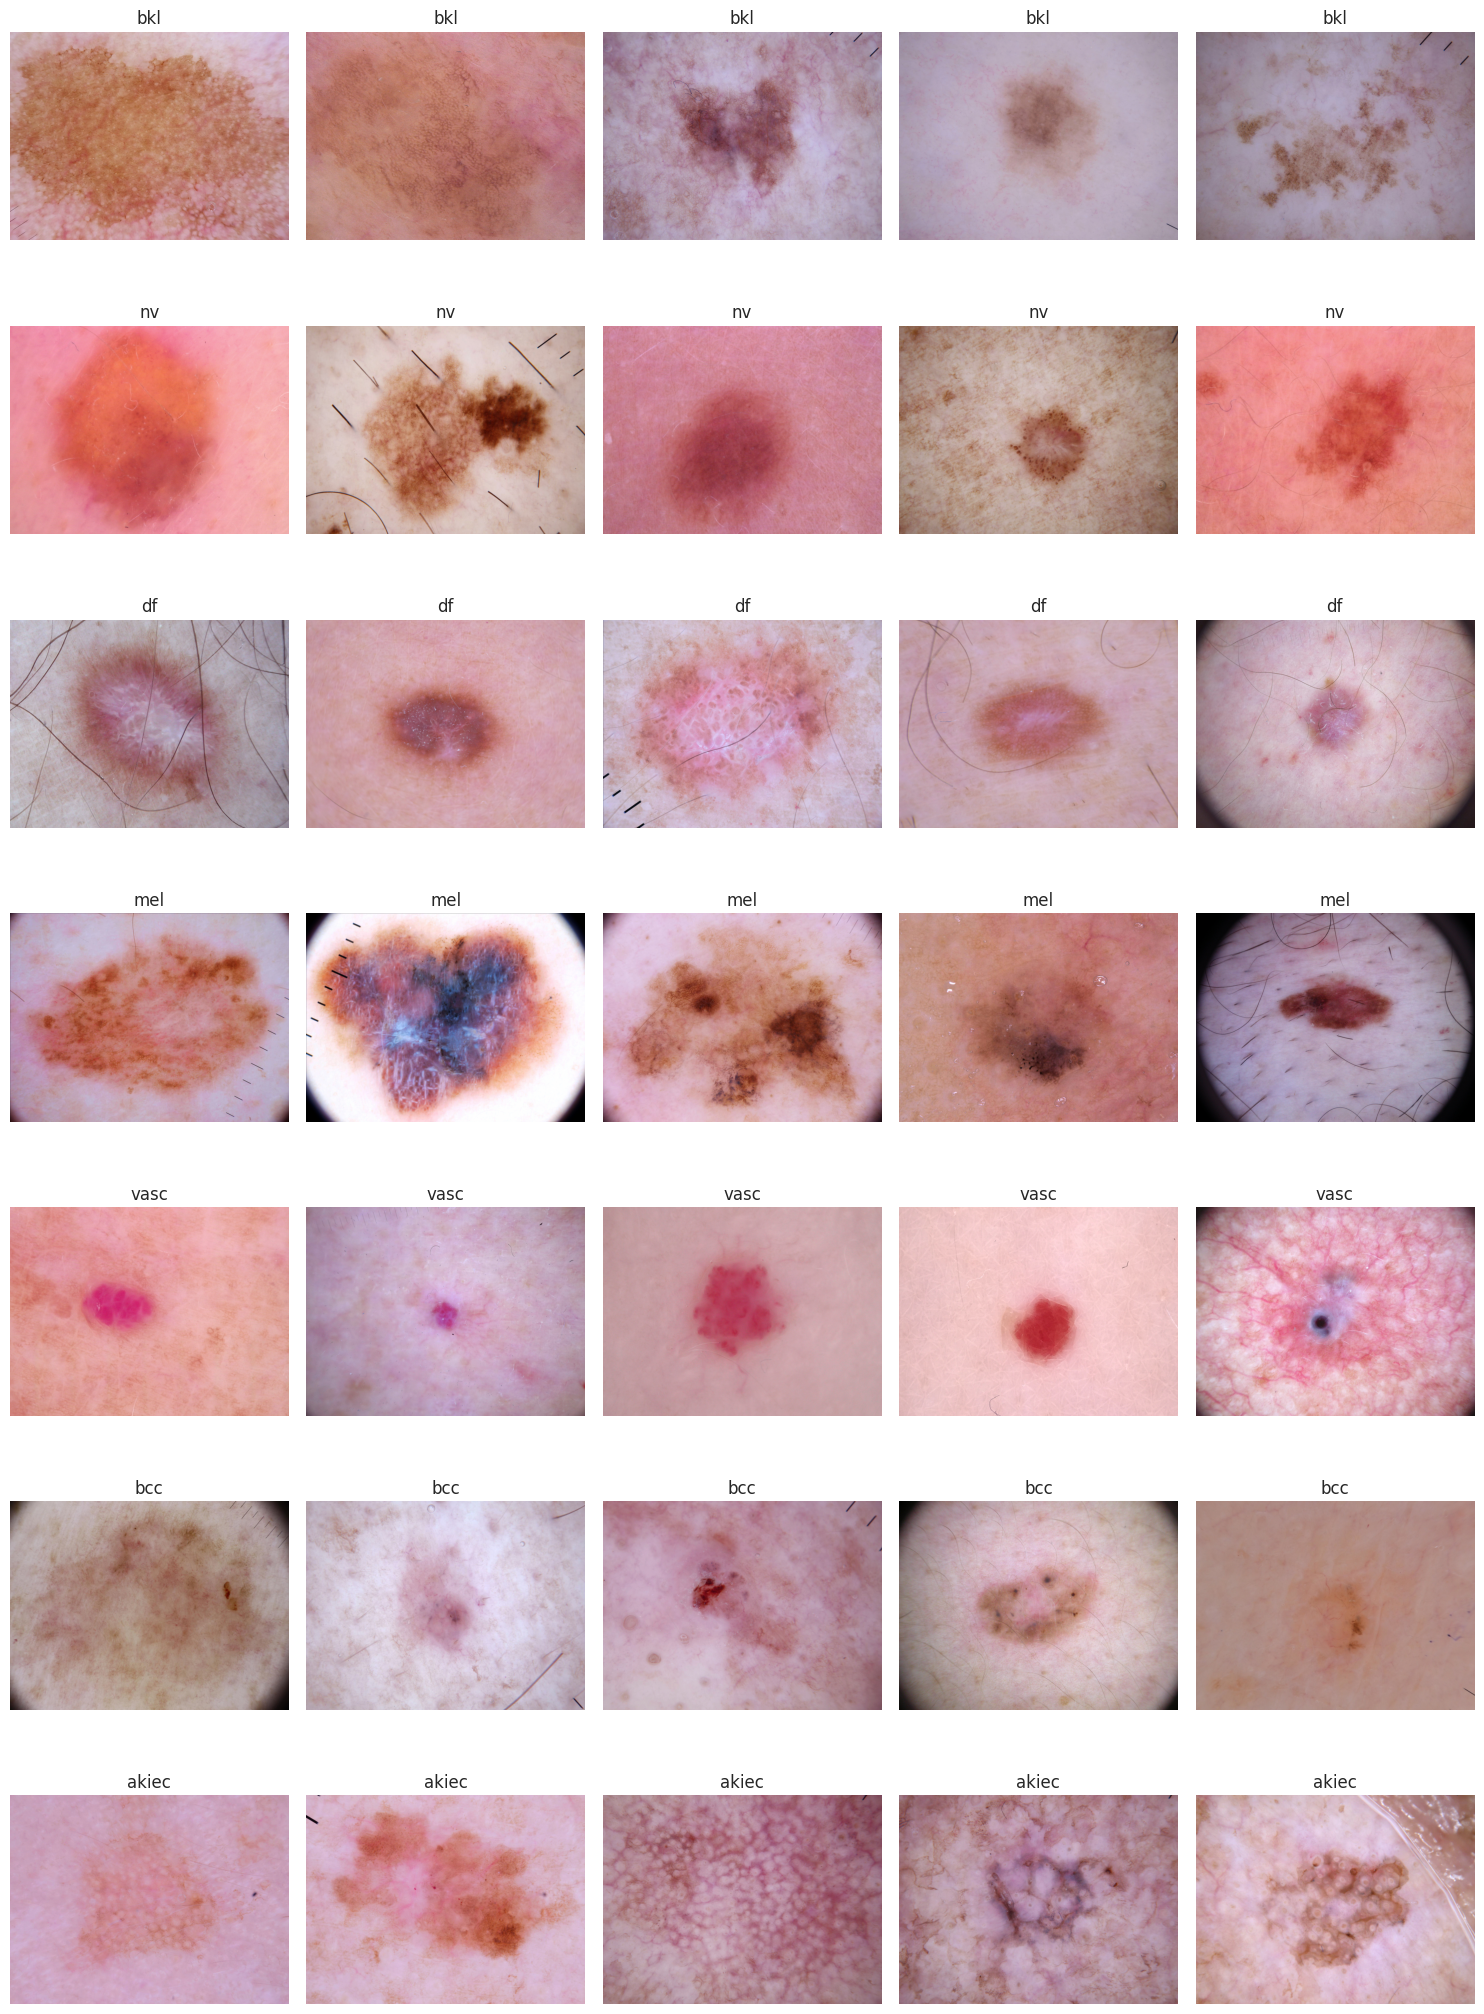

In [32]:

classes = df['dx'].unique()
samples_per_class = 5
plt.figure(figsize=(samples_per_class * 3, len(classes) * 3))
i = 1

for class_name in classes:
    class_df = df[df['dx'] == class_name]
    n_samples = min(samples_per_class, len(class_df))
    class_images = class_df.sample(n_samples, random_state=42)

    for _, row in class_images.iterrows():
        image_path = row['image_path']
        if os.path.exists(image_path):
            try:
                img = Image.open(image_path)
                plt.subplot(len(classes), samples_per_class, i)
                plt.imshow(img)
                plt.title(class_name)
                plt.axis('off')
                i += 1
            except Exception as e:
                print(f" Could not open image: {image_path} | Error: {e}")
        else:
            print(f" Image not found: {image_path}")

plt.tight_layout()
plt.show()


In [36]:
!pip install tensorflow


In [42]:


image_dir = '/content/drive/MyDrive/HAM10000/images/'


df['image_id'] = df['image_id'] + '.jpg'

dataset_dir = '/content/skin_images_dataset'
os.makedirs(dataset_dir, exist_ok=True)

for label in df['dx'].unique():
    os.makedirs(os.path.join(dataset_dir, label), exist_ok=True)

for _, row in df.iterrows():
    src = os.path.join(image_dir, row['image_id'])
    dst = os.path.join(dataset_dir, row['dx'], row['image_id'])
    if not os.path.exists(dst):
        try:
            tf.io.gfile.copy(src, dst, overwrite=False)
        except:
            continue

BATCH_SIZE = 32
IMG_SIZE = (128, 128)

train_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='training',
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

val_ds = image_dataset_from_directory(
    dataset_dir,
    validation_split=0.2,
    subset='validation',
    seed=123,
    image_size=IMG_SIZE,
    batch_size=BATCH_SIZE
)

AUTOTUNE = tf.data.AUTOTUNE
train_ds = train_ds.cache().shuffle(1000).prefetch(buffer_size=AUTOTUNE)
val_ds = val_ds.cache().prefetch(buffer_size=AUTOTUNE)
label_encoder = LabelEncoder()
labels_encoded = label_encoder.fit_transform(labels)


class_names = label_encoder.classes_
num_classes = len(class_names)


base_model = EfficientNetB0(include_top=False, input_shape=(128, 128, 3), weights='imagenet')
base_model.trainable = False
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dropout(0.5)(x)
output = Dense(num_classes, activation='softmax')(x)

model = Model(inputs=base_model.input, outputs=output)

model.compile(optimizer=Adam(learning_rate=0.001),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# Train
history = model.fit(
    train_ds,
    validation_data=val_ds,
    epochs=10,
    callbacks=[early_stop]
)


Found 5000 files belonging to 7 classes.
Using 4000 files for training.
Found 5000 files belonging to 7 classes.
Using 1000 files for validation.
Epoch 1/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 174s 1s/step - accuracy: 0.6235 - loss: 1.1789 - val_accuracy: 0.7470 - val_loss: 0.7308
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 129s 1s/step - accuracy: 0.7093 - loss: 0.8468 - val_accuracy: 0.7660 - val_loss: 0.6640
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 119s 949ms/step - accuracy: 0.7303 - loss: 0.7862 - val_accuracy: 0.7750 - val_loss: 0.6391
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 123s 987ms/step - accuracy: 0.7217 - loss: 0.7720 - val_accuracy: 0.7780 - val_loss: 0.6151
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 133s 1s/step - accuracy: 0.7355 - loss: 0.7378 - val_accuracy: 0.7870 - val_loss: 0.5964
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 137s 1s/step - accuracy: 0.7464 - loss: 0.7120 - val_accuracy: 0.7780 - val_loss: 0.5836
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 126s 1s/step - accuracy: 0.7576 - 

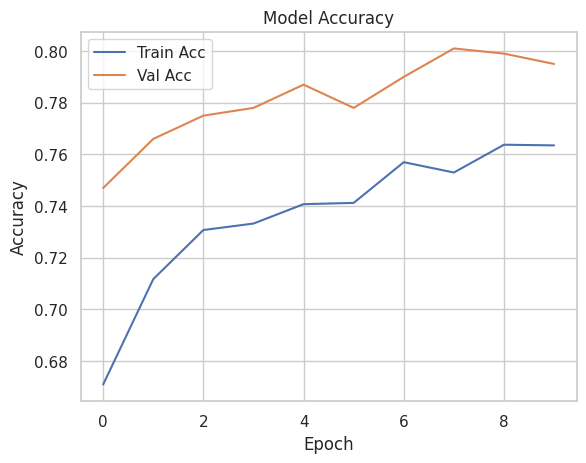

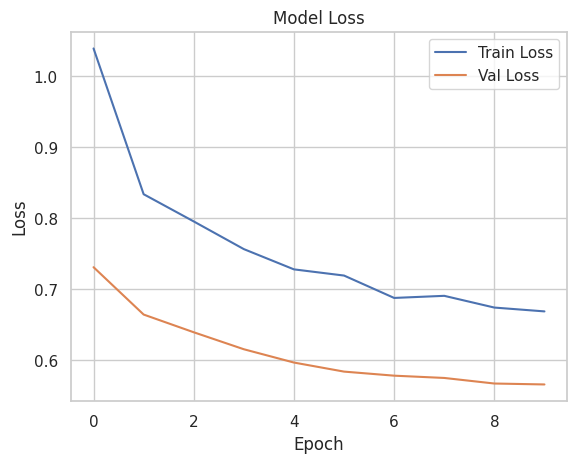

In [43]:
# Plot accuracy
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()


Saving ISIC_0024306.jpg to ISIC_0024306.jpg
1/1 ━━━━━━━━━━━━━━━━━━━━ 3s 3s/step


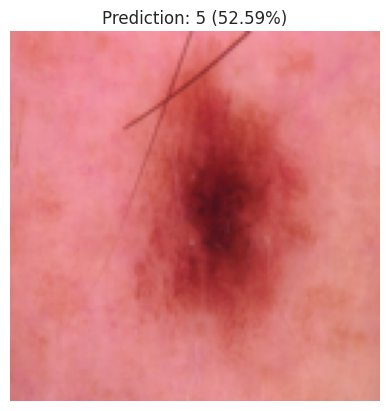

In [50]:
import os
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

class_names = label_encoder.classes_

uploaded = files.upload()
for filename in uploaded.keys():

    img = Image.open(filename).convert('RGB')
    img = img.resize((128, 128))
    img_array = img_to_array(img)
    img_array = img_array / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    predictions = model.predict(img_array)
    predicted_index = np.argmax(predictions)
    predicted_label = class_names[predicted_index]
    confidence = predictions[0][predicted_index] * 100

    plt.imshow(img)
    plt.axis('off')
    plt.title(f"Prediction: {predicted_label} ({confidence:.2f}%)")
    plt.show()
